In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


IMPORTING THE REQUIRED LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder


IMPORTING THE DATASET

In [ ]:
 shipment=pd.read_csv('/content/drive/MyDrive/Mini Project/shipping_data.csv')
 shipment.head(3347)

,Unnamed: 0,shipment_id,send_timestamp,pick_up_point,drop_off_point,source_country,destination_country,freight_cost,gross_weight,shipment_charges,shipment_mode,shipping_company,selected,shipping_time
0,0,S000720,2019-06-08 07:17:51,A,Y,GB,IN,88.61,355.0,0.75,Air,SC3,Y,5.00741
1,1,S000725,2019-07-12 15:23:21,A,Y,GB,IN,85.65,105.0,0.90,Ocean,SC1,Y,21.41215
2,2,S000736,2019-10-04 14:23:29,A,Y,GB,IN,86.22,100.0,0.75,Air,SC3,Y,5.33692
3,3,S000738,2020-01-07 09:19:50,A,Y,GB,IN,94.43,1071.0,1.05,Air,SC2,Y,5.14792
4,4,S000739,2020-04-11 06:36:03,A,Y,GB,IN,94.24,2007.0,0.75,Air,SC3,Y,5.03067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3342,3342,S770724,2019-07-11 12:41:49,A,Y,GB,IN,85.60,105.0,0.90,Ocean,SC1,Y,30.29039
3343,3343,S770735,2019-09-24 11:55:44,A,Y,GB,IN,88.53,405.0,0.75,Air,SC3,Y,5.08773
3344,3344,S771736,2019-11-08 10:52:29,A,Y,GB,IN,90.85,1107.0,0.90,Ocean,SC1,Y,19.53113
3345,3345,S771738,2020-03-12 12:54:27,A,Y,GB,IN,93.60,1005.0,1.05,Air,SC2,Y,5.27639


NUMERICAL COLUMNS

In [ ]:
shipment.describe()

,Unnamed: 0,freight_cost,gross_weight,shipment_charges,shipping_time
count,5114.000000,5114.000000,5114.000000,5114.000000,5114.000000
mean,2556.500000,91.200923,954.074099,0.871732,12.641822
std,1476.428969,5.154340,1266.102859,0.127972,10.273164
min,0.000000,82.885600,5.000000,0.562500,5.000000
25%,1278.250000,87.750000,225.000000,0.750000,5.199910
50%,2556.500000,90.750000,505.000000,0.900000,5.405150
75%,3834.750000,92.837500,1100.000000,0.900000,19.644270
max,5113.000000,115.620000,10000.000000,1.125000,57.249650


Data Cleaning

---


• Treating missing values
• Treating faulty values

Let’s find all the columns having missing values

In [ ]:
shipment.isna().sum()


Unnamed: 0             0
shipment_id            0
send_timestamp         0
pick_up_point          0
drop_off_point         0
source_country         0
destination_country    0
freight_cost           0
gross_weight           0
shipment_charges       0
shipment_mode          0
shipping_company       0
selected               0
shipping_time          0
dtype: int64

There are no missing values in our dataset. Hence we can proceed further with preprocessing.

GARBAGE IN GARBAGE OUT

Dropping the unwanted columns which are of no use for our prediction

In [ ]:
shipment1=shipment.drop(['Unnamed: 0','shipment_id','send_timestamp','pick_up_point','source_country','destination_country','selected'], axis = 1)
shipment1.head()

,drop_off_point,freight_cost,gross_weight,shipment_charges,shipment_mode,shipping_company,shipping_time
0,Y,88.61,355.0,0.75,Air,SC3,5.00741
1,Y,85.65,105.0,0.90,Ocean,SC1,21.41215
2,Y,86.22,100.0,0.75,Air,SC3,5.33692
3,Y,94.43,1071.0,1.05,Air,SC2,5.14792
4,Y,94.24,2007.0,0.75,Air,SC3,5.03067


We have removed unwanted columns from our dataset. We need to convert drop_off_point,shipment_mode,shipping_company into numeric format before starting Exploratory Data Analysis (EDA).

In [ ]:
shipment1["drop_off_point"].value_counts()

Y    4817
X     297
Name: drop_off_point, dtype: int64

In [ ]:
shipment1["shipment_mode"].value_counts()

Air      2664
Ocean    2450
Name: shipment_mode, dtype: int64

In [ ]:
shipment1["shipping_company"].value_counts()

SC1    2247
SC3    1656
SC2    1211
Name: shipping_company, dtype: int64

In [ ]:
cols = ['drop_off_point', 'shipment_mode', 'shipping_company']
#
# Encode labels of multiple columns at once
#
shipment1[cols] = shipment1[cols].apply(LabelEncoder().fit_transform)

# Print head
shipment1.head()

,drop_off_point,freight_cost,gross_weight,shipment_charges,shipment_mode,shipping_company,shipping_time
0,1,88.61,355.0,0.75,0,2,5.00741
1,1,85.65,105.0,0.90,1,0,21.41215
2,1,86.22,100.0,0.75,0,2,5.33692
3,1,94.43,1071.0,1.05,0,1,5.14792
4,1,94.24,2007.0,0.75,0,2,5.03067


In [ ]:
shipment1.dtypes

drop_off_point        int64
freight_cost        float64
gross_weight        float64
shipment_charges    float64
shipment_mode         int64
shipping_company      int64
shipping_time       float64
dtype: object

Hence we have converted categorical data into numeric data by using sklearn standard scaler. We can now proceed with Exploratory Data Analysis (EDA)

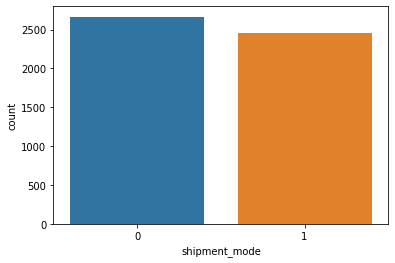

In [ ]:
sns.countplot(x='shipment_mode',data=shipment1)

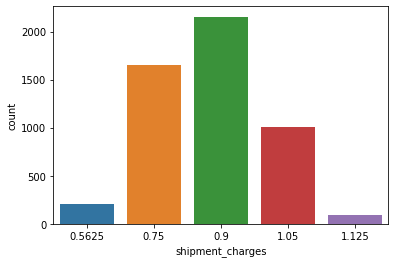

In [ ]:
sns.countplot(x='shipment_charges',data=shipment1)

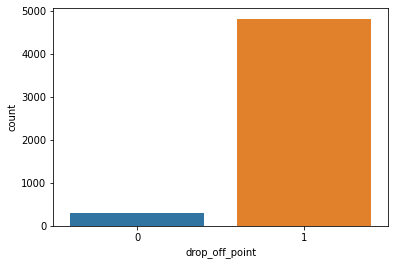

In [ ]:
sns.countplot(x='drop_off_point',data=shipment1)

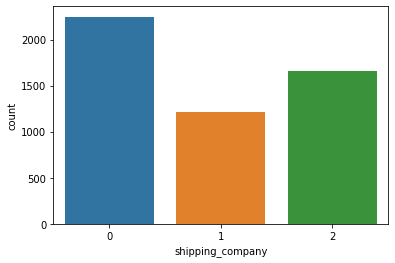

In [ ]:
sns.countplot(x='shipping_company',data=shipment1)

We have plotted box plot to check the independent variable have outliers.

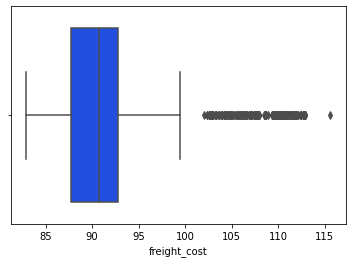

In [ ]:
# Freight cost has outliers.
sns.boxplot(data=shipment1, x='freight_cost', palette='bright')

Lower Bound Limit - 
80.11874999999999

Upper Bound Limit - 
100.46875000000001


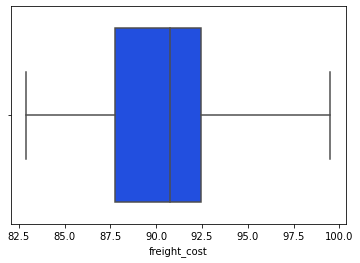

In [ ]:
d1= shipment1['freight_cost']
q1, q3= np.percentile(d1,[25,75])
iqr = q3 - q1
lower_bound = q1 -(1.5 * iqr) 
upper_bound = q3 +(1.5 * iqr) 
print("Lower Bound Limit - ") 
print(lower_bound)
print("\nUpper Bound Limit - ")
print(upper_bound)

med = shipment1['freight_cost'].median()

shipment1['freight_cost'] = np.where(shipment1['freight_cost'] > upper_bound, med, shipment1['freight_cost'])
sns.boxplot(data=shipment1, x='freight_cost', palette='bright')


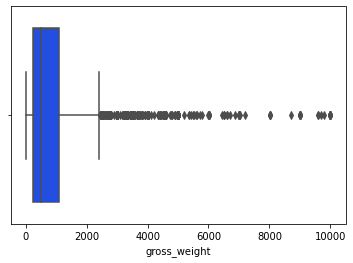

In [ ]:
# gross weight has outliers
sns.boxplot(data=shipment1, x='gross_weight', palette='bright')

Lower Bound Limit - 
-195.0

Upper Bound Limit - 
925.0


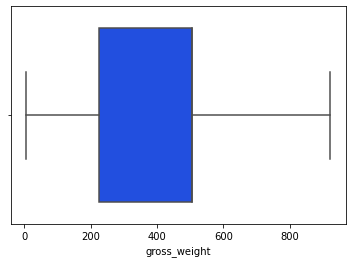

In [ ]:
d1= shipment1['gross_weight']
q1, q3= np.percentile(d1,[25,75])
iqr = q3 - q1
lower_bound = q1 -(1.5 * iqr) 
upper_bound = q3 +(1.5 * iqr) 
print("Lower Bound Limit - ") 
print(lower_bound)
print("\nUpper Bound Limit - ")
print(upper_bound)

med = shipment1['gross_weight'].median()

shipment1['gross_weight'] = np.where(shipment1['gross_weight'] > upper_bound, med, shipment1['gross_weight'])
sns.boxplot(data=shipment1, x='gross_weight', palette='bright')

In [ ]:
shipment1.tail()

,drop_off_point,freight_cost,gross_weight,shipment_charges,shipment_mode,shipping_company,shipping_time
5109,0,90.75,304.00,1.1250,1,0,15.26933
5110,0,90.75,240.00,0.5625,1,1,12.41192
5111,0,90.75,400.00,1.1250,1,0,5.68333
5112,0,90.75,398.00,1.1250,1,0,41.97199
5113,0,90.75,143.16,1.1250,1,0,5.58981


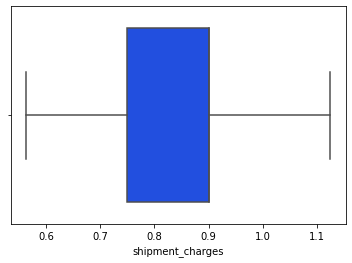

In [ ]:
# shipment charges doesn't have outliers.
sns.boxplot(data=shipment1, x='shipment_charges', palette='bright')

In [ ]:
shipment1.head()

,drop_off_point,freight_cost,gross_weight,shipment_charges,shipment_mode,shipping_company,shipping_time
0,1,88.61,355.0,0.75,0,2,5.00741
1,1,85.65,105.0,0.90,1,0,21.41215
2,1,86.22,100.0,0.75,0,2,5.33692
3,1,94.43,1071.0,1.05,0,1,5.14792
4,1,94.24,2007.0,0.75,0,2,5.03067


We have plotted histogram to see the distribution of data whether it is normal, right skewed or left skewed.

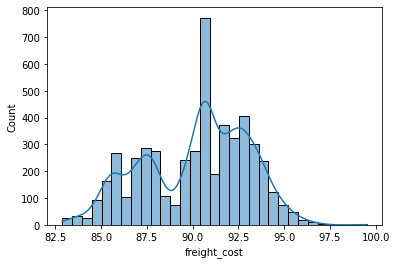

In [ ]:
# The distribution of the variable freight cost is right skewed.
sns.histplot(data=shipment1, x='freight_cost', palette='bright', kde=True)

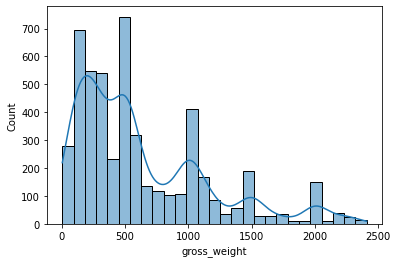

In [ ]:

#Gross weight is also right skewed.
sns.histplot(data=shipment1, x='gross_weight', palette='bright', kde=True)

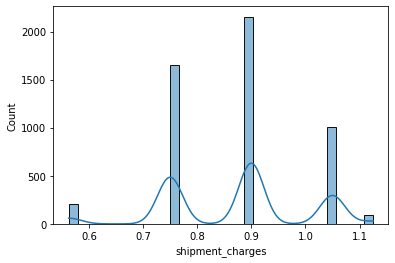

In [ ]:
#Normal distribution with different means***
sns.histplot(data=shipment1, x='shipment_charges', palette='bright', kde=True)

In [ ]:
shipment2=shipment1.drop(['drop_off_point','shipment_mode','shipping_company'], axis = 1)
print(shipment2.head())

   freight_cost  gross_weight  shipment_charges  shipping_time
0         88.61         355.0              0.75        5.00741
1         85.65         105.0              0.90       21.41215
2         86.22         100.0              0.75        5.33692
3         94.43        1071.0              1.05        5.14792
4         94.24        2007.0              0.75        5.03067


In [ ]:
cor=shipment2.corr()
cor.head()

,freight_cost,gross_weight,shipment_charges,shipping_time
freight_cost,1.000000,-0.035342,0.011528,-0.063068
gross_weight,-0.035342,1.000000,0.077964,0.034481
shipment_charges,0.011528,0.077964,1.000000,0.049514
shipping_time,-0.063068,0.034481,0.049514,1.000000


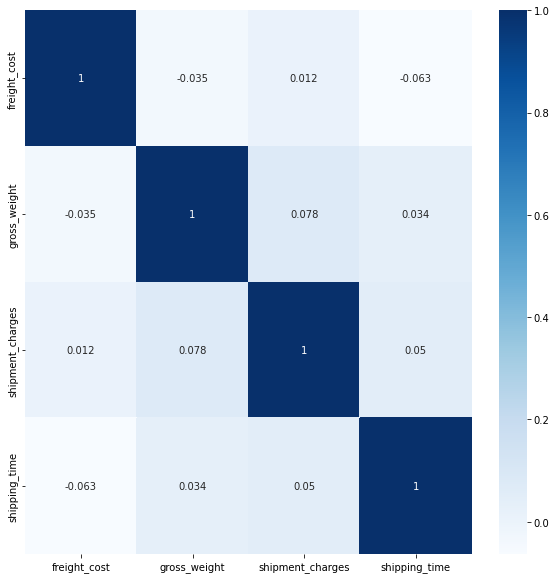

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(shipment2.corr(),cbar=True,annot=True,cmap='Blues')

We are done with EDA. Now we will proceed further with Data Modelling

Dividing the features into independent and dependent

In [ ]:
Y = shipment1.pop('shipping_time') 
X = shipment1

In [ ]:
X.head()

,drop_off_point,freight_cost,gross_weight,shipment_charges,shipment_mode,shipping_company
0,1,88.61,355.0,0.75,0,2
1,1,85.65,105.0,0.90,1,0
2,1,86.22,100.0,0.75,0,2
3,1,94.43,1071.0,1.05,0,1
4,1,94.24,2007.0,0.75,0,2


In [ ]:
Y.head()

0     5.00741
1    21.41215
2     5.33692
3     5.14792
4     5.03067
Name: shipping_time, dtype: float64

As seen above shipping time which is dependent is not present in the datasset.

Modelling
1. Dividing the data into Train and Test parts

The dataset has been split into train and test(unseen data). The test size is 30% and the remaining data is used for training. 
Random state ensures that the split of data is reproducible.We get same number of data everytime.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=123)

In [ ]:
X_train

,drop_off_point,freight_cost,gross_weight,shipment_charges,shipment_mode,shipping_company
4234,1,89.900000,405.00,0.75,0,2
3346,1,90.400000,111.00,0.75,0,2
2450,1,95.002516,297.16,0.75,0,2
2147,1,93.198417,800.00,0.75,0,2
3586,1,90.775159,1320.00,1.05,0,1
...,...,...,...,...,...,...
1593,1,89.750000,455.00,0.90,1,0
4060,1,92.484994,220.50,0.75,0,2
1346,1,87.775300,235.00,0.90,1,0
3454,1,93.660000,113.00,0.75,0,2


In [ ]:
X_test

,drop_off_point,freight_cost,gross_weight,shipment_charges,shipment_mode,shipping_company
621,1,85.85,1171.0,0.9000,1,0
5044,0,90.75,200.0,0.5625,1,1
2638,1,92.10,153.5,1.0500,0,1
288,1,92.65,545.0,0.9000,1,0
1079,1,87.10,2008.0,1.0500,0,1
...,...,...,...,...,...,...
1748,1,91.96,54.5,1.0500,0,1
2828,1,87.87,65.0,1.0500,0,1
195,1,92.85,193.5,1.0500,0,1
315,1,92.80,1006.0,0.7500,0,2


We will scale the numeric data (freight_cost, gross_weight and shipment_charges) using StandardScaler.
Columns drop_off_point, shipment_mode and shipping_company are already label encoded (categorical)

Feature Scaling:- ML algorithms do not perform well when numerical features have different scales.(eg:- x= 6 to 40,000 y=1 to 15). To improve our data we use feature scaling using one of the two methods.
1)Normalization- Here we bring the values in the range 0 to 1.(MinMaxScaler in sklearn).This is used when we do not know the distribution of the data.
2) Standardization- Here we bring the data with mean 0 and SD =1.
Standardization is used when we know that our distribution is gaussian.(Bell Curve)

In [ ]:
#Importing libraries which will be used further.
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

As seen from the EDA (histogram), we see that some of our variables do not have a normal distribution. In order to perform regression we need to have our data within a certain range. Hence we have performed standardization.

In [ ]:
#Using minmax scaler to scale the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
columns_to_scale=['freight_cost', 'gross_weight', 'shipment_charges']
X_train[columns_to_scale]  = scaler.fit_transform(X_train[columns_to_scale]) 
X_test[columns_to_scale]  = scaler.fit_transform(X_test[columns_to_scale]) 
X_train.head()

,drop_off_point,freight_cost,gross_weight,shipment_charges,shipment_mode,shipping_company
4234,1,0.422188,0.166459,0.333333,0,2
3346,1,0.452282,0.044112,0.333333,0,2
2450,1,0.729302,0.121581,0.333333,0,2
2147,1,0.620716,0.330836,0.333333,0,2
3586,1,0.474863,0.547233,0.866667,0,1


## Linear Regression


In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
# Fitting the model(training data)
lr.fit(X_train, y_train)
#Predicting on unseen data
y_pred_lr = lr.predict(X_test)
mse = mean_squared_error(y_pred_lr, y_test)
print('mean_squared_error: ', mse)

errors = abs(y_pred_lr - y_test)
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

mean_squared_error:  48.34909910720015
Accuracy: 73.55 %.


From the EDA (Boxplot) we noticed that some of our variables had outliers. Thus we need to use an algorithm that is robust to outlier. Random forest is great at handling outliers and hence we have used this algorithm for data modelling.

In [ ]:
y_pred=lr.predict(X_test)
print(y_pred)

[20.19563112 21.16146238  5.28974898 ...  5.28140438  5.14127829
 24.2046593 ]


In [ ]:
lr.predict([[1,0.214282,0.040020,0.333333,0,2]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([5.30428455])

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.5750755495725282

Predicted values

In [ ]:
pred_y_df=pd.DataFrame({'Actul Value':y_test,'Predicted value':y_pred,'Difference':y_test-y_pred})
pred_y_df[5:400]

,Actul Value,Predicted value,Difference
2696,21.40035,20.289133,1.111217
248,5.05891,5.248482,-0.189572
1071,5.15185,5.244170,-0.092320
574,5.04329,5.208011,-0.164721
1544,5.15023,5.277536,-0.127306
...,...,...,...
935,5.06701,5.296576,-0.229566
4248,5.38889,5.294229,0.094661
418,21.13565,20.211653,0.923997
3408,5.14317,5.122557,0.020613


In [ ]:
#Checking the coefficients of b1,b2,b3,b4,b5,b6
lr.coef_

array([-1.25815632, -0.03827083, -0.39408049,  6.51779143, 20.26681624,
        3.4697993 ])

In [ ]:
#Checking the intercept (b)
lr.intercept_

-2.5257808612809303

In [ ]:
#Checking multiple linear regression mathematically
#Z=B0+B1x1+B2x2+B3x3+B4x4+B5x5+B6x6
Z=-1.43622631*1+-0.34155018*0.21428+-0.42549689*0.040020+6.48333985*0.333333+-20.27163419*0+3.4583507*2-2.3223926750284516
print(Z)

5.228977779083399


In [ ]:
coeff = [-1.26622329, -0.03783952, -0.28243834,  6.51302604, 20.26628982,
        3.46808871]

input_param = [1,0.422188,0.436205,0.333333,0,2]

total = 0
for i in range(0, 6):
    total += coeff[i]*input_param[i]
    
total+=lr.intercept_
total

5.17600337034093

In [ ]:
import statsmodels.api as sm
X_train_constant = sm.add_constant(X_train)
lm = sm.OLS(y_train, X_train_constant).fit()
print(lm.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                            OLS Regression Results                            
Dep. Variable:          shipping_time   R-squared:                       0.573
Model:                            OLS   Adj. R-squared:                  0.572
Method:                 Least Squares   F-statistic:                     799.5
Date:                Wed, 11 May 2022   Prob (F-statistic):               0.00
Time:                        04:21:49   Log-Likelihood:                -11830.
No. Observations:                3579   AIC:                         2.367e+04
Df Residuals:                    3572   BIC:                         2.372e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -2.5258      3.707  

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

rf = RandomForestRegressor(n_estimators = 1000, random_state = 15)
# Fitting the model(training data)
rf.fit(X_train, y_train)
#Predicting on unseen data
y_pred_rf = rf.predict(X_test)
mse = mean_squared_error(y_pred_rf, y_test)
print('mean_squared_error: ', mse)

errors = abs(y_pred_rf - y_test)
#mape-mean absolute percentage error. It is a metric for model evaluation.
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_rf))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_rf)))

mean_squared_error:  62.47276483613835
Accuracy: 71.34 %.
Mean Absolute Error: 4.396641753090492
Root Mean Squared Error: 7.903971459724431


In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 2000, random_state = 15)
# Fitting the model(training data)
rf.fit(X_train, y_train)
#Predicting on unseen data
y_pred_rf = rf.predict(X_test)
mse = mean_squared_error(y_pred_rf, y_test)
print('mean_squared_error: ', mse)

errors = abs(y_pred_rf - y_test)
#mape-mean absolute percentage error. It is a metric for model evaluation.
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

mean_squared_error:  62.417267297007236
Accuracy: 71.33 %.
Mean Absolute Error: 3.964478320527046
Root Mean Squared Error: 6.953351645587914


**CONCLUSION**:- 



* Linear Regression gave a better accuracy that is 73.69% as compared to
Random Forest that gave an accuracy of 72.01%.
* Given the independent variables (	drop_off_point,	freight_cost,	gross_weight,	shipment_charges,	shipment_mode,	shipping_company) we have a 73.69% chance of predicting the shipment time.
* The accuracy of the model can be increased with a bigger dataset.

  








